In [25]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [26]:
%matplotlib inline

In [27]:
rhpass=pd.read_csv("password_redhat-wireshark_edit_2.csv", parse_dates=['Time'])
rhpass.head()

,No.,Time,Source,Destination,Protocol,Length,Info
0,1,2011-11-05 08:06:58,fe80::230:48ff:fedf:5a1b,ff02::1:2,DHCPv6,90,Solicit XID: 0xa25ff5 CID: 00010001c792bc97003...
1,2,2011-11-05 08:07:04,10.10.10.15,10.10.10.5,SMB,149,"NT Create AndX Request, FID: 0x731b, Path: \\l..."
2,3,2011-11-05 08:07:04,10.10.10.5,10.10.10.15,SMB,161,"NT Create AndX Response, FID: 0x731b[Malformed..."
3,4,2011-11-05 08:07:04,10.10.10.15,10.10.10.5,DCERPC,194,"Bind: call_id: 1, Fragment: Single, 1 context ..."
4,5,2011-11-05 08:07:04,10.10.10.5,10.10.10.15,SMB,105,"Write AndX Response, FID: 0x731b, 72 bytes"


In [28]:
rhpass.describe()

,No.,Length
count,22406.000000,22406.000000
mean,11203.500000,124.788405
std,6468.199402,201.704982
min,1.000000,42.000000
25%,5602.250000,60.000000
50%,11203.500000,62.000000
75%,16804.750000,106.000000
max,22406.000000,1514.000000


In [29]:
rhpass['Info'].describe()

count                          22405
unique                         14733
top       Negotiate Protocol Request
freq                             776
dtype: object

In [30]:
infodata = rhpass[['Time','Source','Destination','Protocol',
                  'Length','Info']]

In [31]:
infodata.head()

,Time,Source,Destination,Protocol,Length,Info
0,2011-11-05 08:06:58,fe80::230:48ff:fedf:5a1b,ff02::1:2,DHCPv6,90,Solicit XID: 0xa25ff5 CID: 00010001c792bc97003...
1,2011-11-05 08:07:04,10.10.10.15,10.10.10.5,SMB,149,"NT Create AndX Request, FID: 0x731b, Path: \\l..."
2,2011-11-05 08:07:04,10.10.10.5,10.10.10.15,SMB,161,"NT Create AndX Response, FID: 0x731b[Malformed..."
3,2011-11-05 08:07:04,10.10.10.15,10.10.10.5,DCERPC,194,"Bind: call_id: 1, Fragment: Single, 1 context ..."
4,2011-11-05 08:07:04,10.10.10.5,10.10.10.15,SMB,105,"Write AndX Response, FID: 0x731b, 72 bytes"


In [32]:
category_group=infodata.groupby(['Source','Destination','Protocol']).sum()
category_group

Length
Source                   Destination       Protocol        
0.0.0.0                  255.255.255.255   DHCP      256650
10.10.10.15              10.10.10.255      BROWSER     3834
                                           NBNS          92
                         10.10.10.35       BROWSER      219
                                           DCERPC       186
                                           ICMP         148
                                           LANMAN      1387
                                           NBNS         312
                                           NBSS         580
                                           SMB       330013
                                           SRVSVC       950
                                           TCP       136300
                         10.10.10.5        DCERPC      1358
                                           HTTP         400
                                           LSARPC      4584
                                           NBSS        1008
                                           SAMR        2172
                                           SMB         7069
                                           SSHv2     640284
                                           TCP        20612
                         192.168.17.1      TCP       169724
                         192.168.220.1     TCP       168996
10.10.10.35              10.10.10.15       DCERPC       194
                                           ICMP         148
                                           LANMAN      1408
                                           NBNS         116
                                           NBSS        1260
                                           SMB       354339
                                           SRVSVC       846
                                           TCP       277978
...                                                     ...
                         10.10.10.5        HTTP       15604
                                           SSHv2      14838
                                           TCP        51232
                         224.0.0.22        IGMPv3       120
                         239.255.255.250   SSDP        1196
10.10.10.5               10.10.10.15       DCERPC      2755
                                           HTTP         518
                                           LSARPC      2040
                                           NBSS         480
                                           SAMR        1550
                                           SMB         5350
                                           SSHv2     107582
                                           TCP        19774
                         10.10.10.255      BROWSER     3042
                         10.10.10.35       SSHv1      11971
                                           TCP        21127
                         161.139.16.2      DNS           84
192.168.17.1             10.10.10.15       TCP        47058
192.168.220.1            10.10.10.15       TCP        46810
3com_68:a6:95            Broadcast         ARP          360
                         Tp-LinkT_b5:79:3f ARP          240
AsustekC_6e:72:34        Broadcast         ARP        20820
                         Tp-LinkT_b5:79:3f ARP          240
Micro-St_60:f7:fb        Broadcast         ARP           60
                         Tp-LinkT_b5:79:3f ARP          120
Micro-St_60:f8:09        Tp-LinkT_b5:79:3f ARP          360
Tp-LinkT_b5:79:3f        AsustekC_6e:72:34 ARP         1596
                         Broadcast         ARP        21546
                         Micro-St_60:f8:09 ARP         4368
fe80::230:48ff:fedf:5a1b ff02::1:2         DHCPv6      3240

[62 rows x 1 columns]

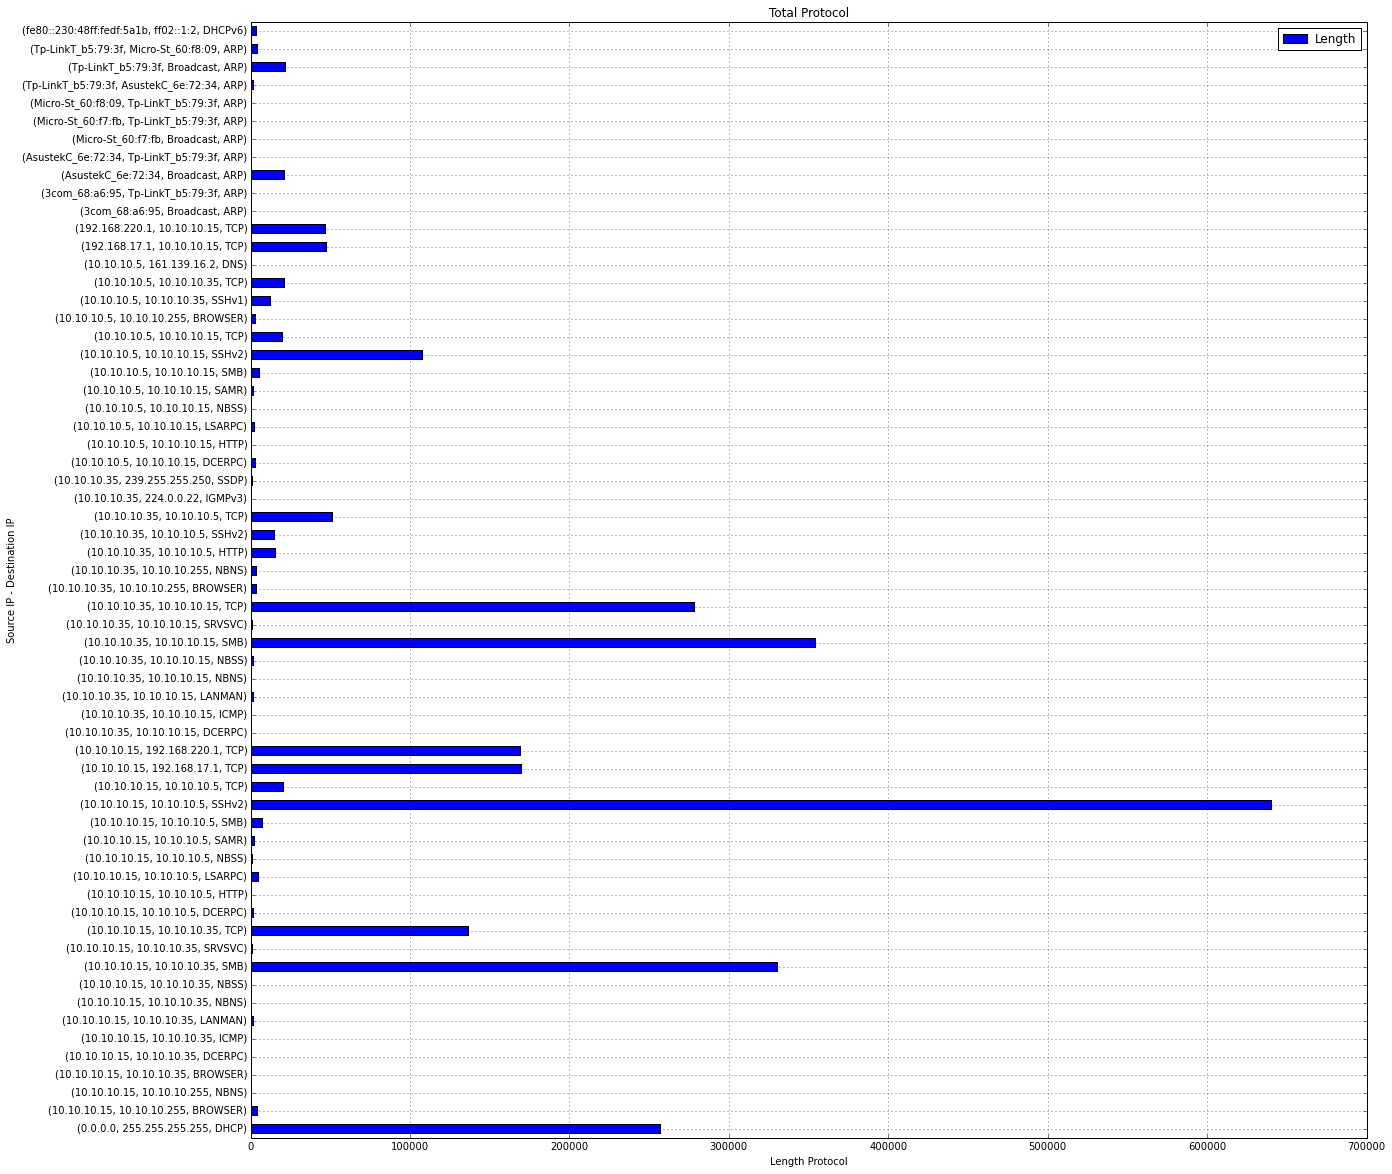

In [33]:
my_plot = category_group.plot(kind='barh',stacked=True,title="Total Protocol",figsize=(20, 20))
my_plot.set_xlabel("Length Protocol")
my_plot.set_ylabel("Source IP - Destination IP")

In [34]:
fig = my_plot.get_figure()
fig.savefig("total-protocol-password-redhat-attack-per.png")

In [35]:
category_group.unstack().head()

Length                                        \
Protocol                        ARP  BROWSER  DCERPC    DHCP  DHCPv6  DNS   
Source      Destination                                                     
0.0.0.0     255.255.255.255     NaN      NaN     NaN  256650     NaN  NaN   
10.10.10.15 10.10.10.255        NaN     3834     NaN     NaN     NaN  NaN   
            10.10.10.35         NaN      219     186     NaN     NaN  NaN   
            10.10.10.5          NaN      NaN    1358     NaN     NaN  NaN   
            192.168.17.1        NaN      NaN     NaN     NaN     NaN  NaN   

                                                                             \
Protocol                     HTTP  ICMP  IGMPv3  LANMAN  LSARPC  NBNS  NBSS   
Source      Destination                                                       
0.0.0.0     255.255.255.255   NaN   NaN     NaN     NaN     NaN   NaN   NaN   
10.10.10.15 10.10.10.255      NaN   NaN     NaN     NaN     NaN    92   NaN   
            10.10.10.35       NaN   148     NaN    1387     NaN   312   580   
            10.10.10.5        400   NaN     NaN     NaN    4584   NaN  1008   
            192.168.17.1      NaN   NaN     NaN     NaN     NaN   NaN   NaN   

                                                                                
Protocol                     SAMR     SMB  SRVSVC  SSDP  SSHv1   SSHv2     TCP  
Source      Destination                                                         
0.0.0.0     255.255.255.255   NaN     NaN     NaN   NaN    NaN     NaN     NaN  
10.10.10.15 10.10.10.255      NaN     NaN     NaN   NaN    NaN     NaN     NaN  
            10.10.10.35       NaN  330013     950   NaN    NaN     NaN  136300  
            10.10.10.5       2172    7069     NaN   NaN    NaN  640284   20612  
            192.168.17.1      NaN     NaN     NaN   NaN    NaN     NaN  169724

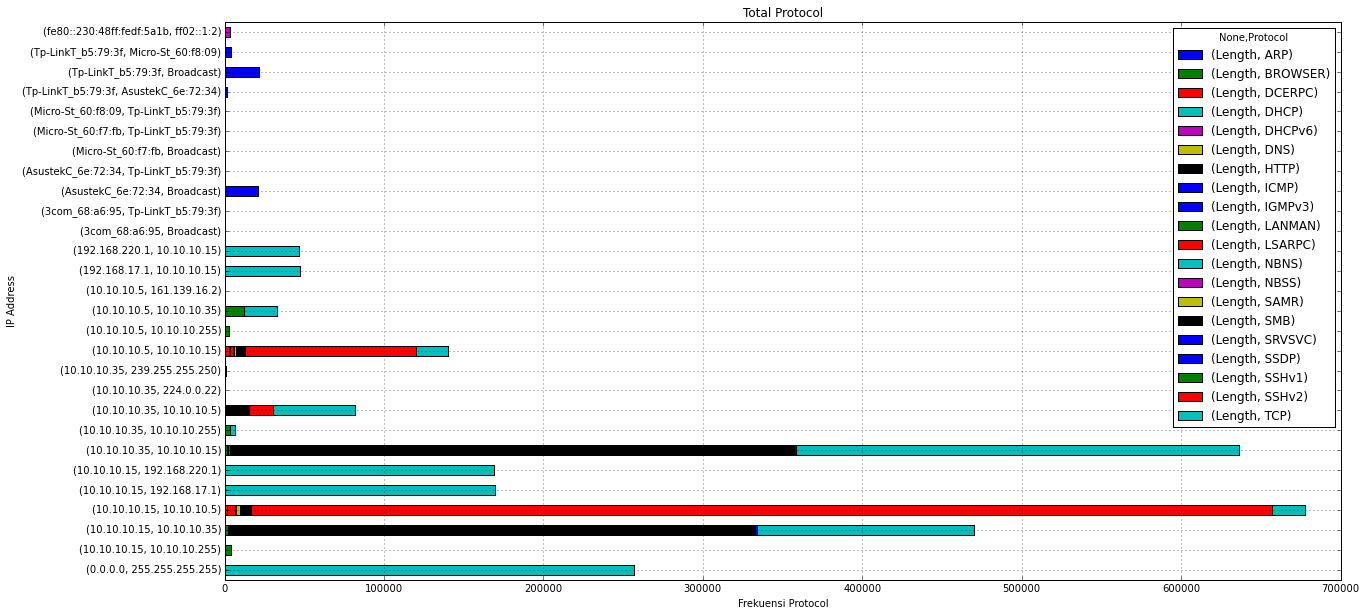

In [36]:
my_plot = category_group.unstack().plot(kind='barh',stacked=True,title="Total Protocol",figsize=(20, 10))
my_plot.set_xlabel("Frekuensi Protocol")
my_plot.set_ylabel("IP Address")

In [37]:
fig = my_plot.get_figure()
fig.savefig("total-protocol-password-redhat-attack.png")

In [38]:
infodata2 = rhpass[['Length','Time']]
infodata2.head()

,Length,Time
0,90,2011-11-05 08:06:58
1,149,2011-11-05 08:07:04
2,161,2011-11-05 08:07:04
3,194,2011-11-05 08:07:04
4,105,2011-11-05 08:07:04


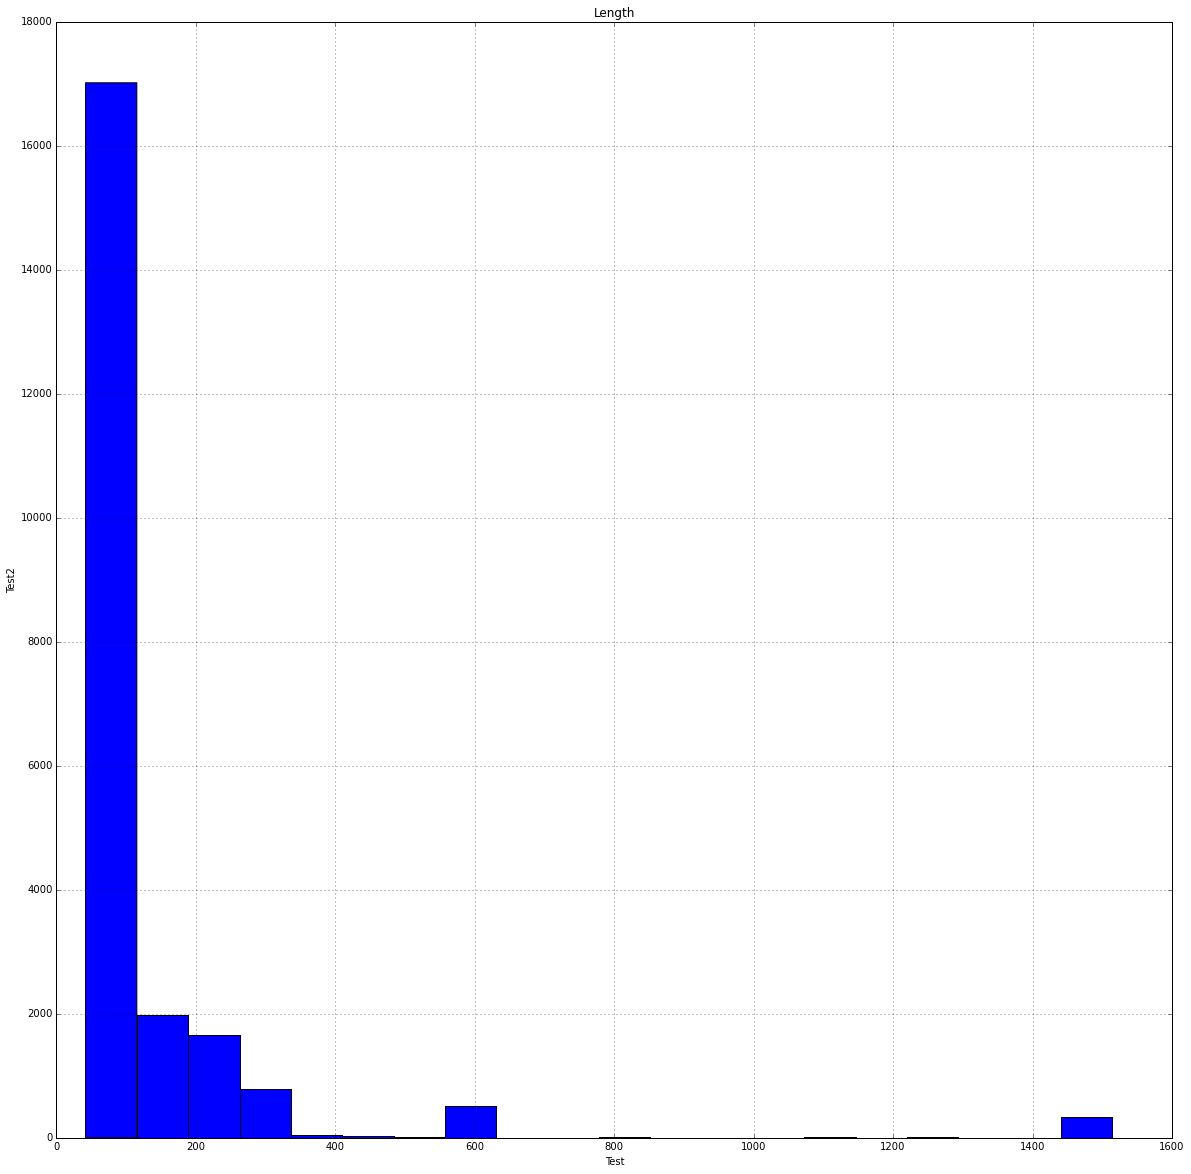

In [39]:
infodata2_plot = infodata2['Length'].hist(bins=20,figsize=(20,20))
infodata2_plot.set_title("Length")
infodata2_plot.set_xlabel("Test")
infodata2_plot.set_ylabel("Test2")

In [40]:
infodata2 = rhpass[['Length','Time']]
infodata2.head()

,Length,Time
0,90,2011-11-05 08:06:58
1,149,2011-11-05 08:07:04
2,161,2011-11-05 08:07:04
3,194,2011-11-05 08:07:04
4,105,2011-11-05 08:07:04


In [41]:
infodata2 = infodata2.set_index('Time')
infodata2.head()

,Length
Time,
2011-11-05 08:06:58,90
2011-11-05 08:07:04,149
2011-11-05 08:07:04,161
2011-11-05 08:07:04,194
2011-11-05 08:07:04,105


In [42]:
infodata2.resample('S',how=sum).head()

,Length
Time,
2011-11-05 08:06:58,90
2011-11-05 08:06:59,NaN
2011-11-05 08:07:00,NaN
2011-11-05 08:07:01,NaN
2011-11-05 08:07:02,NaN


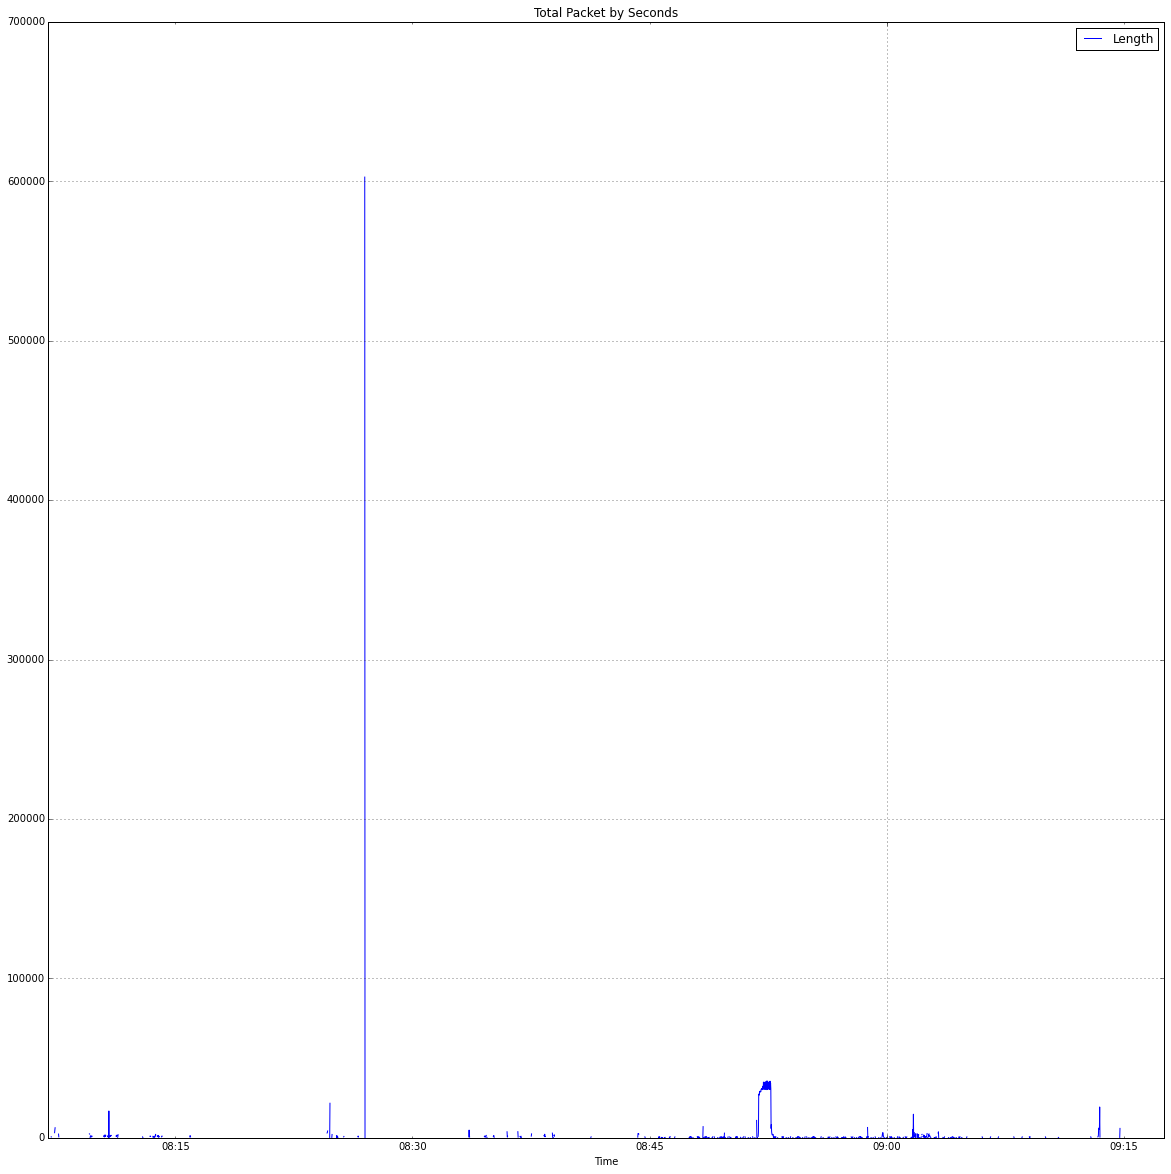

In [43]:
infodata2_plot = infodata2.resample('S',how=sum).plot(title="Total Packet by Seconds",figsize=(20,20))

In [44]:
fig = infodata2_plot.get_figure()
fig.savefig("total-packetbysecond-password-redhat-attack-perseconds.png")

In [45]:
infodata2.resample('T',how=sum).head()

,Length
Time,
2011-11-05 08:06:00,90
2011-11-05 08:07:00,31945
2011-11-05 08:08:00,6420
2011-11-05 08:09:00,17237
2011-11-05 08:10:00,39898


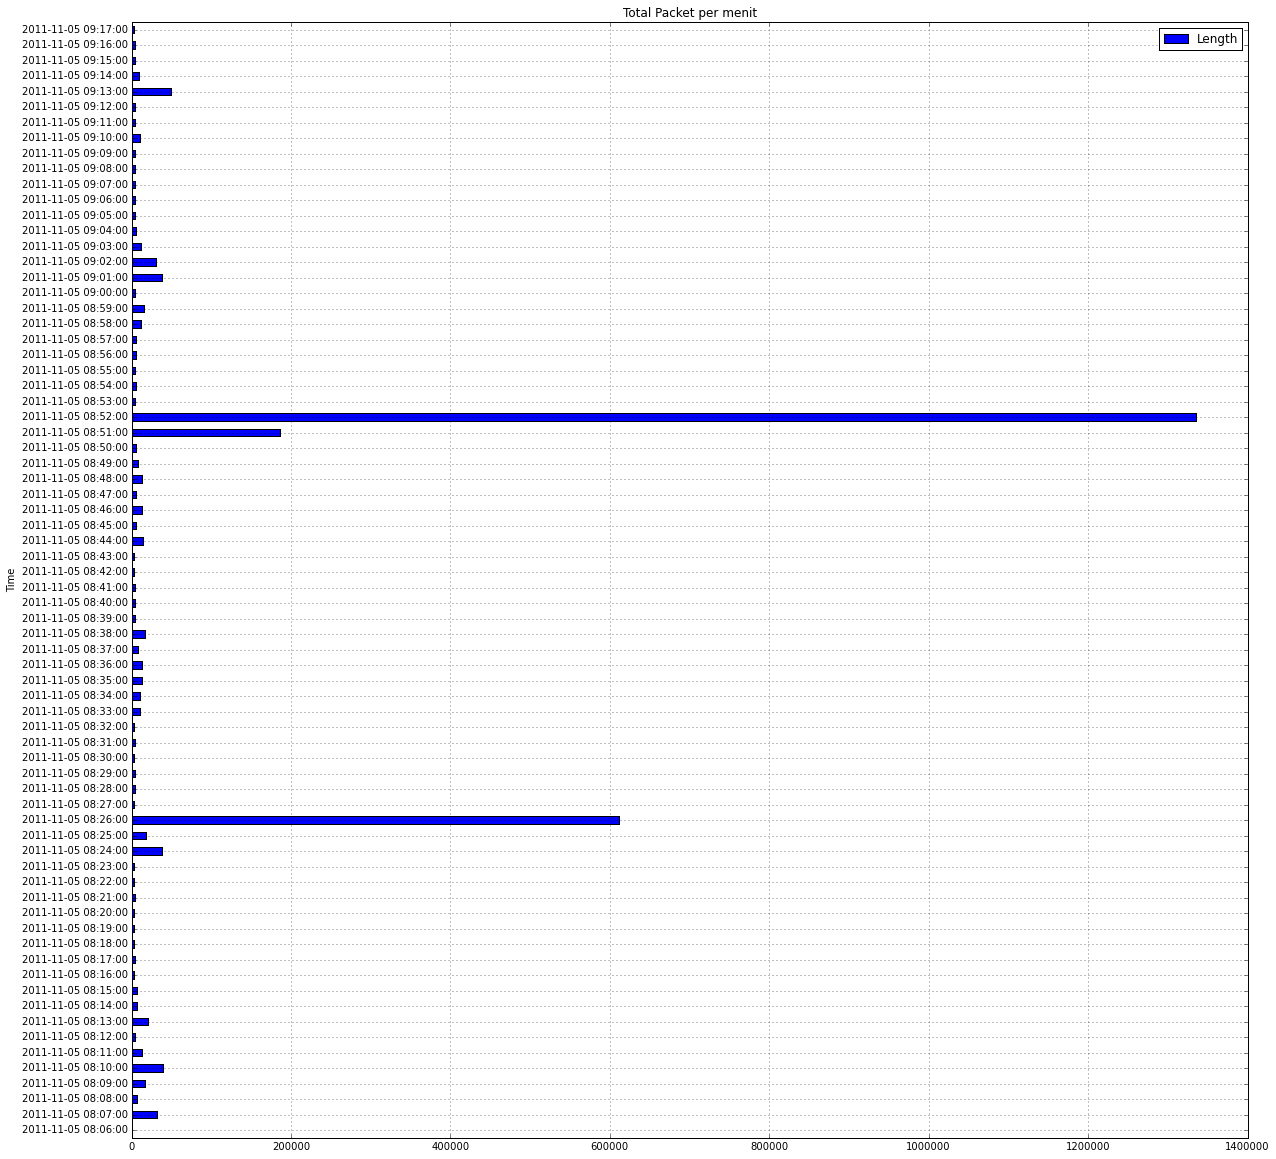

In [46]:
infodata2_plot = infodata2.resample('T',how=sum).plot(kind="barh",title="Total Packet per menit",figsize=(20,20))

In [47]:
fig = infodata2_plot.get_figure()
fig.savefig("total-packetbysecond-password-redhat-attack-permenit.png")